Explanation Notes for Colab Notebook - Audio Clustering Using ImageBind Model
This notebook performs audio clustering using the ImageBind model by Facebook Research and applies K-Means clustering to group audio samples based on learned representations. Below is an analysis of the steps involved in the code.



In [ ]:
# prompt: download dataset from kaggle

!pip install kaggle

# You need to upload your kaggle.json file to the Colab environment.
# The kaggle.json file contains your Kaggle API credentials.
# You can find it in your Kaggle account settings.
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Replace 'username/dataset-name' with the actual username and dataset name.
!kaggle datasets download -d vivmankar/hindi-speech-classification




Dataset URL: https://www.kaggle.com/datasets/vivmankar/hindi-speech-classification
License(s): CC0-1.0
 73% 43.0M/58.5M [00:00<00:00, 100MB/s]
100% 58.5M/58.5M [00:00<00:00, 115MB/s]


This command uses the Kaggle API to download the hindi-speech-classification dataset. Replace the vivmankar/hindi-speech-classification with the actual dataset name if different.

In [ ]:
! unzip hindi-speech-classification.zip

Archive:  hindi-speech-classification.zip
  inflating: dataset/test.csv        
  inflating: dataset/test/common_voice_hi_23795246.mp3  
  inflating: dataset/test/common_voice_hi_23795247.mp3  
  inflating: dataset/test/common_voice_hi_23796043.mp3  
  inflating: dataset/test/common_voice_hi_23796065.mp3  
  inflating: dataset/test/common_voice_hi_23809921.mp3  
  inflating: dataset/test/common_voice_hi_23809930.mp3  
  inflating: dataset/test/common_voice_hi_23827788.mp3  
  inflating: dataset/test/common_voice_hi_23827793.mp3  
  inflating: dataset/test/common_voice_hi_23830510.mp3  
  inflating: dataset/test/common_voice_hi_23830511.mp3  
  inflating: dataset/test/common_voice_hi_23830512.mp3  
  inflating: dataset/test/common_voice_hi_23832725.mp3  
  inflating: dataset/test/common_voice_hi_23839869.mp3  
  inflating: dataset/test/common_voice_hi_23847550.mp3  
  inflating: dataset/test/common_voice_hi_23847553.mp3  
  inflating: dataset/test/common_voice_hi_23849305.mp3  
  inflat

In [ ]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@eb04d1b21e08cfd0713164c0907aeb4c98fd83af timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 146 (delta 60), reused 39 (delta 39), pack-reused 58 (from 1)
Receiving objects: 100% (146/146), 2.64 MiB | 27.08 MiB/s, done.
Resolving deltas: 100% (68/68), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision eb04d1b21e08cfd0713164c0907aeb4c98fd83af) to /tmp/pip-req-build-kihozbi5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-kihozbi5
  Running command git rev-parse -q --verify 'sha^eb04d1b21e08cfd0713164c0907aeb4c98fd83af'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Running command git checkout -q eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit eb04d1b2

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
%cd ImageBind
!pip install -e .



/content/ImageBind
Obtaining file:///content/ImageBind
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-v9yjhh5u/pytorchvideo_85a5d69541914d18b3940b6cf6aa5b07
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-v9yjhh5u/pytorchvideo_85a5d69541914d18b3940b6cf6aa5b07
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 42.1 MB/s eta 0:00:00
  Ins

This installs the ImageBind package in the current environment, enabling access to its pretrained models and utilities for handling multimodal data (including audio).


In [ ]:
import torch
from sklearn.cluster import KMeans
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind import data

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


Loads a pretrained ImageBind Huge model, which has been trained on multiple modalities (including audio).
The model is switched to evaluation mode (eval()) since we are performing inference, not training.
The model is moved to the selected device (GPU/CPU).

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Load the pretrained ImageBind model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [ ]:
audio_paths = ["dataset/train/common_voice_hi_23795240.mp3", "dataset/train/common_voice_hi_23795241.mp3","dataset/train/common_voice_hi_23795241.mp3","dataset/train/common_voice_hi_23795249.mp3","dataset/train/common_voice_hi_24258322.mp3","dataset/train/common_voice_hi_24258341.mp3","dataset/train/common_voice_hi_24359430.mp3","dataset/train/common_voice_hi_24359431.mp3"]

# Load and preprocess audio data
audio_data = data.load_and_transform_audio_data(audio_paths, device)

In [ ]:
import os
folder_path = "dataset/train"

# List all .wav files in the folder
audio_paths = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if file.endswith(".mp3")
][:50]

In [ ]:
audio_data = data.load_and_transform_audio_data(audio_paths, device)



Uses the ImageBind model to generate embeddings (feature vectors) from the preprocessed audio data. The embeddings are a compact representation of the audio data in the feature space.

The torch.no_grad() context ensures no gradients are computed, as we're in inference mode.



In [ ]:
with torch.no_grad():
    inputs = {ModalityType.AUDIO: audio_data}
    embeddings = model(inputs)

# Extract the audio embeddings as a NumPy array for clustering
audio_embeddings = embeddings[ModalityType.AUDIO].cpu().numpy()
print(audio_embeddings.shape)  #

(50, 1024)


In [ ]:
num_clusters = 2

# Apply k-means clustering on the embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(audio_embeddings)

print("Cluster labels for each audio file:", labels)

Cluster labels for each audio file: [1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 1 1]


Visualizes the clusters by plotting the reduced embeddings. Each point in the plot corresponds to an audio file, and points belonging to the same cluster are shown in the same color.


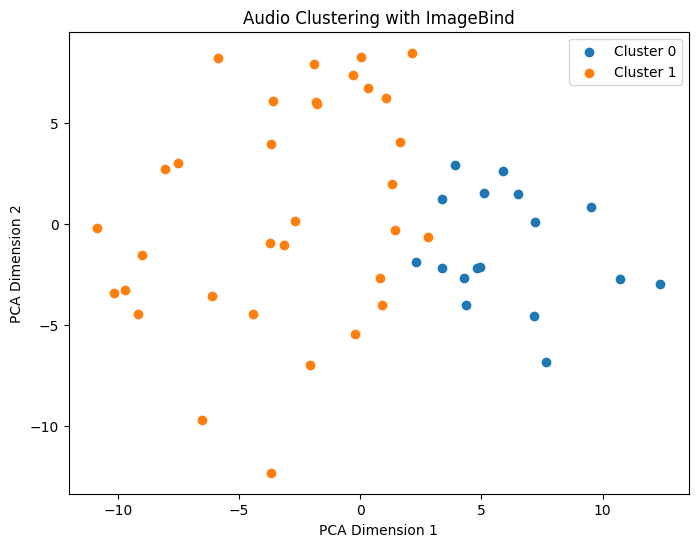

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(audio_embeddings)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_points = reduced_embeddings[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")

plt.title("Audio Clustering with ImageBind")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()

Summary:
This notebook demonstrates how to use the ImageBind model to extract high-quality feature embeddings from audio files, and then applies K-Means clustering to group similar audio samples. The results are visualized in a 2D plot using PCA.



